# Veri Madenciliği Final Projesi

Sınıflandırma, farklı veri sınıflarını gruplandırabilen bir veri analizi biçimidir.
Sınıflandırma ile çözüm verilen eğitim kümesinden veri sınıflarını öğrenilmesi ve
ilgili sınıfın belirli olmadığı test verileri geldiğinde doğru şekilde sınıflandırmaya çalışılmasıdır.

Proje Konusu:
Covid süresince Global location datasından Google’in elde etmiş olduğu mobility datası https://www.google.com/covid19/mobility/ sitesi üzerinden yayınlanmıştır. 
Bu projede bu data analiz edilip raporlanmıştır. DateFrame'in 9-14 sütun verileri feautre olarak kullanılmıştır ve çeşitli sınıflandırma yöntemleriyle aylar tahmin edilmiştir. 
Projede beklenen ayların tahminin doğru bir şekilde yapılmasıdır. Çeşitli sınıflandırma yöntemleriyle "Month" sütunundaki veriler doğru bir şekilde tahmin edilmeye çalışılmıştır. 
Bu problemden yola çıkarak bazı analizler yapılmıştır. Proje 2 şekilde incelenilmiştir:

1.
2020 verisetinde bulunan yaz aylarındaki değerler eğitim için kullanılmıştır.
2021 veriseti ile test edilmiş ve hangi aylarda gerçekleşmiş olduğu tahmin edilmiştir. olduğunu tahmin ettik
2020 datasının %70 train için, 2021 veri setinin %30u ise test için kullanılmıştır.
Bu aşamada amacımız yılların birbirine göre yaz aylarındaki değişimleri gözlemlemektir. 
Böylece her iki sene için incelenen değerlere göre 2022 için yaz aylarındeki hareketlilik tahmini mümkün olabilmektedir. Bu şekilde tersten bir tahmin modeli oluşturulabilir. 


2.kısım:
2020 veri setinin %70 train için %30'u test için kullanılmıştır.
1. kısım ile aynı işlem uygulanmıştır ama bu kısımda tek bir veri seti kullanılarak gerçekleştirilmiştir.
Böylece kendi için tahmin ve sınıflandırma değerlerini ölçülebilmiştir. 

İlk olarak temel kütüphaneler olan numpy ve pandas import edilmiştir. Projemiz için model oluşturma kısımlarını kolaylaştıracak bütün gerekli kütüphaneleri içe aktarılması gerekmektedir. Logistic Regression ve diğer modelleri kullanabilmek için sklearn kütüphanesi import edilmiştir. Şemaları ve grafikleri çizip sonuçları görselleştirmek için ise matplotlib kütüphanesini kullanılacaktır. Elimizdeki veriyi eğitim ve test aşaması olarak bölmemize yardımcı olması için sklearn modülünün fonksiyonlarını import edilmiştir. Encoding, Confusion matris ve diğer metrikler için de gerekli kütüphaneleri yüklenmiştir. 

Proje için 7 farklı model kullanılmıştır. Bu tarz problemlerde tek bir model ile doğru sonucun elde edilmesi mümkün değildir.
Bu nedenle en iyi sonucun elde edilmesi için model sayısı fazla tutulmuş ve 7 model seçilerek proje gerçekleştirilmiştir.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split
from scikitplot.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from PIL import Image

In [172]:
#https://www.google.com/covid19/mobility/
url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url2021 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df20 = pd.read_csv(url2020)
df20

df21 = pd.read_csv(url2021)
df21

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-01,-88.0,-64.0,-71.0,-81.0,-81.0,38.0
1,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-02,-86.0,-57.0,-71.0,-77.0,-64.0,29.0
2,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-03,-85.0,-57.0,-66.0,-74.0,-50.0,21.0
3,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-04,-33.0,18.0,4.0,-17.0,-20.0,7.0
4,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-05,-38.0,12.0,-8.0,-21.0,-22.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158425,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-01,-12.0,101.0,NaN,-17.0,-15.0,3.0
158426,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-02,-14.0,65.0,NaN,-9.0,-17.0,1.0
158427,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-03,-20.0,NaN,NaN,-19.0,-24.0,2.0
158428,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-04,-8.0,111.0,NaN,-4.0,-15.0,1.0


In [ ]:
Bu kısımda 2020 ve 2021 yılları için ay bilgisi alınmıştır. Her iki yıl içinde indexler aylara çevrilmiş ve sıralanmıştır.

In [173]:
date20= pd.to_datetime(df20['date']) 
index20 = pd.DatetimeIndex(date20.values).month 
dframe20= df20.set_index(index20) 
dframe20.index.name = 'Month' 


date21= pd.to_datetime(df21['date']) 
index21 = pd.DatetimeIndex(date21.values).month 
dframe21= df21.set_index(index21) 
dframe21.index.name = 'Month' 


Ayların sınıflandırılması amaçlandığı için aylar sadece index olarak kullanılmamıştır. Ek olarak "Month" sütunu da eklenmiştir. 
"Month" sütunu her iki veri setine 2020 ve 2021 yılları için de eklenmiştir.

In [174]:
index_20 = dframe20.index
dframe20["Month"] = index_20

index_21 = dframe21.index
dframe21["Month"] = index_21


2 veri seti incelendiğinde 2020 yılı için Ocak ayı 2021 yılı içinse Aralık ayı bulunmadığından tüm aylar incelenememektedir. 
Bu nedenle rastgele ay seçimi anlamlandırılma konusunda zor olacağından sadece yaz ayları seçilmiştir. 
Ve sadece yaz ayları incelenilmiştir.

Yukarı da belirtildiği nedenlerden kaynaklı olmak üzere problemimiz gereği her iki veri setinde de "Month" sütununda Haziran, Temmuz ve Ağustos aylarını çekilmiştir.
Bir sonra ki aşama da bu veriler birleştirilmiş ve yeni bir dataframe elde edilmiştir.
Modelin eğitilmesi ve test edilmesi için yeni veri seti hazır hale getirilmiştir.  

In [175]:
a1 = dframe20[dframe20['Month']== 6]
a2 = dframe20[dframe20['Month']== 7]
a3 = dframe20[dframe20['Month']== 8]


b1 = dframe21[dframe21['Month']== 6]
b2 = dframe21[dframe21['Month']== 7]
b3 = dframe21[dframe21['Month']== 8]


c_20 = [a1, a2, a3]
df_20_ = pd.concat(c_20)

c_21 = [b1, b2, b3]
df_21_ = pd.concat(c_21)
df_21_


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Month
Month,,,,,,,,,,,,,,,,
6,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-06-01,-2.0,55.0,27.0,6.0,-11.0,1.0,6
6,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-06-02,-6.0,52.0,26.0,4.0,-11.0,2.0,6
6,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-06-03,-2.0,53.0,41.0,6.0,-8.0,2.0,6
6,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-06-04,-5.0,56.0,42.0,6.0,-10.0,2.0,6
6,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-06-05,-7.0,44.0,44.0,10.0,-5.0,-1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-08-27,-26.0,75.0,NaN,-18.0,-27.0,2.0,8
8,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-08-28,-33.0,40.0,NaN,1.0,-19.0,-2.0,8
8,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-08-29,-38.0,NaN,NaN,-12.0,-21.0,-2.0,8


In [218]:
df_20_

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Month
Month,,,,,,,,,,,,,,,,
6,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-06-01,-25.0,13.0,6.0,-23.0,-21.0,7.0,6
6,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-06-02,-29.0,8.0,5.0,-26.0,-22.0,7.0,6
6,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-06-03,-25.0,14.0,24.0,-24.0,-20.0,6.0,6
6,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-06-04,-27.0,11.0,22.0,-22.0,-19.0,7.0,6
6,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-06-05,-22.0,23.0,44.0,-19.0,-20.0,6.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-08-26,NaN,NaN,NaN,NaN,-22.0,0.0,8
8,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-08-27,NaN,NaN,NaN,NaN,-21.0,0.0,8
8,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-08-28,NaN,NaN,NaN,NaN,-24.0,3.0,8


In [ ]:
Farklı 2 yöntem:
    

Eldeki probleme en uygun tekniklerin seçilmesi, yeterli sayıdaki tekniklerin denenmesi ile mümkün olabilmektedir. 
Bu nedenle veri önişleme ve model kurma aşamaları, en iyi sonucu veren tekniğe ulaşıncaya kadar tekrarlayan bir süreçtir. 
Problemin başarımla yapılabilmesi için problemimize uygun çözüm olarak sınıflandırma modelleri kullanılmıştır. 
Dolaysıyla bizim problemimiz özelinde Denetimli öğrenme modelleri ile uygun çözüm gerçekleştirilmiştir.
Denetimli öğrenmede seçilen tekniğe uygun hazırlanan verilerin, ilk aşamada bir kısmı modelin öğrenimi, diğer kısmı ise modelin performansının test edilmesi için
ayrılmaktadır. Modelin eğitilmesi, eğitim verisi üzerinde uygulandıktan sonra, test verisi ile modelin doğruluk oranı belirlenmektedir. 
Model kuruluşu çalışmalarının sonucuna bağlı olarak, aynı teknikle farklı parametrelerin kullanıldığı veya başka algoritma ve araçların denendiği değişik
modeller kurulabilmektedir. Bu sebeple projemizde accuracy ve diğer metriklerin daha iyi yorumlanabilmesi ve yüksek değerlerin elde edilmesi için farklı makine öğrenmesi modelleri de kullanılmıştır. 

Amacımız ayları sınıflandırmak olduğu için label/etiket olarak (Month) sütunu belirlenmiştir. Ve öznitelikler olarak ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline'] sütunları kullanılmıştır. 

Train, test ayırımı:
Verinin büyük bir kısmı eğitim kümesi olarak, daha küçük bir kısmı ise test kümesi olarak kullanılmalıdır. 
Eğitim ve test verisi oranları konusunda belirlenmiş net bir kriter bulunmamaktadır. Projemiz için %70 train ve %30 test olarak belirlenmiştir.Veriyi eğitim kümesinde eğitip ve test kümesinde ise test işlemi gerçekleştirilmektedir. Bu sürece doğrulama(validation) denmektedir. Bu amacın arkasındaki esas fikir, modelin performansını daha önce görmediği veriler üzerinde ölçümlemektir. Gerçek dünya senaryolarında model, değerleri görmediği veriler üzerinden tahmin edecektir. Ek olarak doğrulama gibi teknikler modeli fazla ya da yetersiz uyumlandırmaktan da kaçınmamızı sağlamaktadır.

Test ve train kesninlikle ayrı olması gerekmektedir, çünkü test verisinde tek bir verinin bile train verisine karışması fazla uyuma neden olur (overfitting)Fazla uyum, modelin eğitildiği spesifik veriye dair her şeyi öğrendiği duruma denmektedir. Eğitim verisinde gayet iyi çalışacak olsa bile daha önce görmediği herhangi bir veri noktasında doğruluk hassasiyeti düşecektir. 

Normalizasyon:
Birçok makine öğrenimi algoritması, sayısal girdi değişkenleri standart bir aralığa ölçeklendiğinde daha iyi performans göstermektedir. Bu, doğrusal regresyon gibi girdinin ağırlıklı toplamını kullanan algoritmaları ve k-en yakın komşular gibi mesafe ölçümlerini kullanan algoritmaları içermektedir.
Bu nedenlerle verileri sc=StandardScaler() kullanılarak ölçeklendirilmiştir. 

 Projenin 1.kısmı 

İlk olarak 2020 veristinde %70lık kısım ile eğitip, 2021 veri setinin %30lık kısımı ile test ettik. 2020....  datasetibdeki veri sayısı: 47516
2021 ... datasındaki veri sayısı: 51985


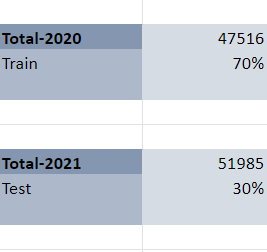

In [7]:
tr_ts_20_21  = Image.open("train-test.png")
tr_ts_20_21 


# 1. Train2020, Test2021

In [ ]:
Birden fazla modelin kullanılmasının nedeni en iyi sonucun elde edilebilmesi içindir. 

In [176]:
df_s20 = df_20_.fillna(0)
df_s21 = df_21_.fillna(0)

k20 =df_s20.loc[:, "Month"] 
y20 = list(k20)
label_encoder20 = LabelEncoder()
Y20 = label_encoder20.fit_transform(y20)
feature_names20 = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']
X20 = df_s20[feature_names20].values
x20_train, x20_test, y20_train, y20_test = train_test_split(X20,Y20,test_size = 0.3, random_state =0)


k21 =df_s21.loc[:, "Month"] 
y21 = list(k21)
label_encoder21 = LabelEncoder()
Y21 = label_encoder21.fit_transform(y21)
feature_names21 = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']
X21 = df_s21[feature_names21].values
x21_train, x21_test, y21_train, y21_test = train_test_split(X21,Y21,test_size = 0.3, random_state =0)

sc=StandardScaler()
X20_train = sc.fit_transform(x20_train) 
X21_test = sc.transform(x21_test)


logr = LogisticRegression(random_state =0)
logr.fit(X20_train, y20_train) 
y_pred_logr = logr.predict(X21_test)
acc_logr = accuracy_score(y21_test, y_pred_logr)

svc = SVC(kernel="rbf")
svc.fit(X20_train, y20_train)
y_pred_svm = svc.predict(X21_test)
acc_svm = accuracy_score(y21_test, y_pred_svm)

knn = KNeighborsClassifier(n_neighbors=5) # k= default
knn.fit(X20_train, y20_train)
y_pred_knn = knn.predict(X21_test)
acc_knn_   = accuracy_score(y21_test, y_pred_knn)

dtc = DecisionTreeClassifier()
dtc.fit(X20_train, y20_train)
y_pred_dtc = dtc.predict(X21_test)
acc_dtc= accuracy_score(y21_test, y_pred_dtc)


gnb = GaussianNB()
gnb.fit(X20_train, y20_train)
y_pred_gnb = gnb.predict(X21_test)
acc_gnb_   = accuracy_score(y21_test, y_pred_gnb)


mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X20_train, y20_train)
y_pred_mlp = mlp.predict(X21_test)
acc_mlp = accuracy_score(y21_test, y_pred_mlp)


print(acc_logr*100, acc_svm*100, acc_knn_*100,acc_dtc*100, acc_gnb_*100,acc_mlp*100)

34.79738394460118 38.009746088740705 39.89484483200821 37.69556296486278 32.681456783790715 36.09899974352398


C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Sonuç:
logr, SVM, knn, dtc, gnb, ve MLP modelleri ile eğitim gerçekleştirilmiştir. Ayrıca bu modeller test edilmiştir.
Aşağıda yazdırılan tabloda bütün modellere ait sonuçlar bulunmaktadır.
Test sonuçları incelendiğinde en yüksek accuracy değeri knn modeli ile elde edildiği gözlemlenmiştir. Bu değer kırmızı olarak da belirtilmiştir.

knn modeli için accuracy değeri 39.89 olarak bulunmuştur.


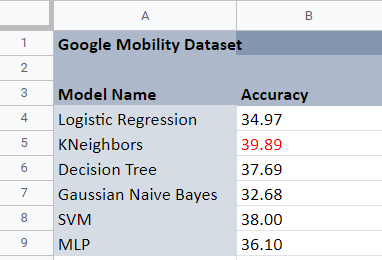

In [3]:
sonuc1 = Image.open("1Sonuc.png")
sonuc1

# 2. Train and Test 2020 dataset

#       2.1.Logistic Regression

In [177]:
sample_list_logr = []  #sample_size'ları tutan liste
acc_list_logr    = []  #her bir sample karşılık gelen 
best_acc_logr    =0
 
    
for i in np.arange(50, 47000, 5000):  

    df_sample = df_20_.sample(n = i)
    df_s = df_sample.fillna(0)
    sample_list_logr.append(i)
    
    
    k =df_s.loc[:, "Month"] 
    y = list(k)
    label_encoder = LabelEncoder()
    Y = label_encoder.fit_transform(y)
    feature_names = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']
    X = df_s[feature_names].values
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state =0)
    sc=StandardScaler()
    X_train = sc.fit_transform(x_train) 
    X_test = sc.transform(x_test)
    logr = LogisticRegression(random_state =0)
    
    logr.fit(X_train, y_train) 
    y_pred_logr = logr.predict(X_test)
    acc_logr = accuracy_score(y_test, y_pred_logr)
    acc_list_logr.append(acc_logr*100)
    
    if best_acc_logr < acc_logr:
        best_acc_logr = acc_logr
    
    
    
print("Sample List: ",sample_list_logr) #x: sample_size'ların listesi 
print("Accuracy List: ", acc_list_logr)

Sample List:  [50, 5050, 10050, 15050, 20050, 25050, 30050, 35050, 40050, 45050]
Accuracy List:  [46.15384615384615, 50.19794140934284, 49.78113808197374, 51.92665426521393, 51.64572112507481, 50.80632284847517, 51.48409423665646, 51.88862261782494, 51.22340956756217, 50.483885288111516]


In [178]:
print("Max Accuracy in Logistic Regression: ", best_acc_logr*100)

Max Accuracy in Logistic Regression:  51.92665426521393


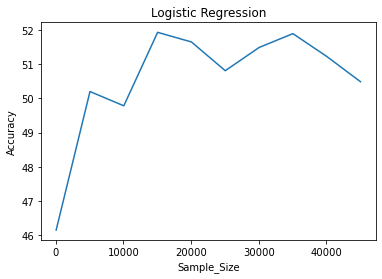

In [179]:
import matplotlib.pyplot as plt

x_logr = sample_list_logr
y_logr = acc_list_logr
plt.plot(x_logr,y_logr)

plt.xlabel("Sample_Size")
plt.ylabel("Accuracy")

plt.title("Logistic Regression") 
plt.show()

Con.matrisi kullanılmasının sebebi kurulan bir sınıflandırma modelinin sonuçlarını yorumlayabilmek, gerçek ve tahmin edilen değerler arasında yer alan ilişkideki hataları çapraz olarak inceleyebilmek içindir. 
Tipik olarak denetimli bir öğrenme algoritması olan bir algoritmanın performansının görselleştirilmesine izin veren özel bir tablo düzenidir. 
True Positive ve True Negative modelin doğru olarak tahminlediği, False Positive ve False Negative ise modelin yanlış olarak tahminlediği alanlardır. 
TP'leri diagonal  elamanlar oluşturmaktadır. 

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

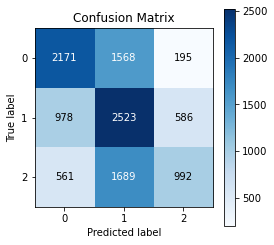

In [180]:
fig, ax = plt.subplots(figsize=(4,4))
plot_confusion_matrix(y_test, y_pred_logr, ax=ax)

Verisetinin doğruluğuna ve dengeli olup olmadığının kararının verilmesi için accuracy değerine bakılması yeterli olmamaktadır.
Bu nedenle projemizde diğer metrikler de hesaplanmıştır. Hesaplanan diğer metrikler:

Hassasiyet (Precision): Tüm sınıflardan, doğru olarak ne kadar tahmin edildiğinin bir ölçüsüdür. Mümkün olduğu kadar yüksek olması istenmektedir. 
Pozitif Tahmin Edici Değer olarak da bilinmektedir. 
    
F Puanı (F Score): Bu, gerçek pozitif değerlerin oranının (recall) ve hassasiyetin (precision) harmonik ortalamasıdır. 
Sınıflandırıcının ne kadar iyi performans gösterdiğinin bir ölçüsüdür ve sınıflandırıcıları karşılaştırmakta sıklıkla kullanılmakatdır. 

Recall: Modelin pozitif classların kaçta kaçını yakalandığının anlamlandırılması, gözlemlenmesi ve incelenmesi için kullanılmaktadır.

Bu metriklerin önemi, modeli hangi amaçla geliştirdiğinize göre değişim göstermektedir.

In [181]:
print('recall: ', recall_score(y_test, y_pred_logr, average= 'macro')*100)
print('precision: ', precision_score(y_test, y_pred_logr, average= 'macro')*100)
print('F1 Score:  ', f1_score(y_test, y_pred_logr, average= 'macro')*100)
print('acc:  ' , accuracy_score(y_test, y_pred_logr)*100)

recall:  49.17209327252867
precision:  52.70613528568012
F1 Score:   49.168067107974096
acc:   50.483885288111516


Elde ettiğimiz değerler incelendiğinde genel olarak  birbirine yakın değerler olduğu gözükmektedir. 
Bunu yorumlamak gerekirse elimizdeki veri setinin dengeli bir veri seti olduğu sonucu çıkarılmaktadır. 

#  2.2.KNeighbors Classifier

In [185]:
sample_list_knn = []  #sample_size'ları tutan liste
acc_list_knn    = []  #her bir sample karşılık gelen 
best_acc_knn    = 0
 
     
for i in np.arange(50, 47000, 5000):  

    df_sample = df_20_.sample(n = i)
    df_s = df_sample.fillna(0)
    sample_list_knn.append(i)
    
    
    k =df_s.loc[:, "Month"] 
    y = list(k)
    label_encoder = LabelEncoder()
    Y = label_encoder.fit_transform(y)
    feature_names = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']
    X = df_s[feature_names].values
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30, random_state =0)
    sc=StandardScaler()
    X_train = sc.fit_transform(x_train) 
    X_test = sc.transform(x_test)
    
    
    knn = KNeighborsClassifier(n_neighbors=5) # k= default
    knn.fit(X_train, y_train)
    
    y_pred_knn = knn.predict(X_test)
    acc_knn    = accuracy_score(y_test, y_pred_knn)
    
    if best_acc_knn < acc_knn:
        best_acc_knn = acc_knn
    acc_list_knn.append(acc_knn*100)
    
    
print("Sample List: ",sample_list_knn) #x: sample_size'ların listesi 
print("Accuracy List: ", acc_list_knn)


Sample List:  [50, 5050, 10050, 15050, 20050, 25050, 30050, 35050, 40050, 45050]
Accuracy List:  [40.0, 54.32343234323432, 58.97180762852404, 58.8704318936877, 59.78387364921031, 61.13107119095144, 60.64337215751525, 61.34094151212553, 61.739492301290056, 61.59082500924898]


In [186]:
print("Max Accuracy KNeighbors : ", best_acc_knn*100)

Max Accuracy KNeighbors :  61.739492301290056


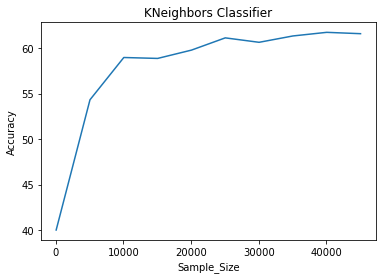

In [187]:
x_knn = sample_list_knn
y_knn = acc_list_knn
plt.plot(x_knn,y_knn)
#plt.titel("Sample-Error ")
plt.xlabel("Sample_Size")
plt.ylabel("Accuracy")

plt.title("KNeighbors Classifier") 
plt.show()

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

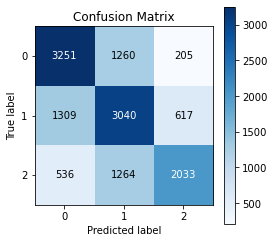

In [188]:
fig, ax = plt.subplots(figsize=(4,4))
plot_confusion_matrix(y_test, y_pred_knn, ax=ax)

In [189]:
print('recall: ', recall_score(y_test, y_pred_knn, average= 'macro')*100)
print('precision: ', precision_score(y_test, y_pred_knn, average= 'macro')*100)
print('F1 Score:  ', f1_score(y_test, y_pred_knn, average= 'macro')*100)
print('acc:  ' , accuracy_score(y_test, y_pred_knn)*100)

recall:  61.06373465411935
precision:  63.21349719197755
F1 Score:   61.60034753395492
acc:   61.59082500924898


# 2.3.Random Forest Classifier

In [192]:
sample_list_rfc = []  #sample_size'ları tutan liste
acc_list_rfc    = []  #her bir sample karşılık gelen 
best_acc_rfc    = 0
 
    
for i in np.arange(50, 47000, 5000):  

    df_sample = df_20_.sample(n = i)
    df_s = df_sample.fillna(0)
    sample_list_rfc.append(i)
    
    
    k =df_s.loc[:, "Month"] 
    y = list(k)
    label_encoder = LabelEncoder()
    Y = label_encoder.fit_transform(y)
    feature_names = ['retail_and_recreation_percent_change_from_baseline', 'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline']
    X = df_s[feature_names].values
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state =0)
    sc=StandardScaler()
    X_train = sc.fit_transform(x_train) 
    X_test = sc.transform(x_test)
    
    
    rfc = RandomForestClassifier(n_estimators=23, criterion = 'gini')
    rfc.fit(X_train, y_train)
    
    y_pred_rfc = rfc.predict(X_test)
    acc_rfc = accuracy_score(y_test, y_pred_rfc)
    
    if best_acc_rfc < acc_rfc:
        best_acc_rfc = acc_rfc
    acc_list_rfc.append(acc_rfc*100)
    
    
    
print("Sample List: ",sample_list_rfc) #x: sample_size'ların listesi 
print("Accuracy List: ", acc_list_rfc)

Sample List:  [50, 5050, 10050, 15050, 20050, 25050, 30050, 35050, 40050, 45050]
Accuracy List:  [15.384615384615385, 40.45922406967538, 39.9124552327895, 40.81849588094605, 40.71414322760822, 41.48171802650487, 41.408225742047115, 41.058998060025104, 41.36622390891841, 41.55198437361272]


In [193]:
print("Max Accuracy Random Forest : ", best_acc_rfc*100)

Max Accuracy Random Forest :  41.55198437361272


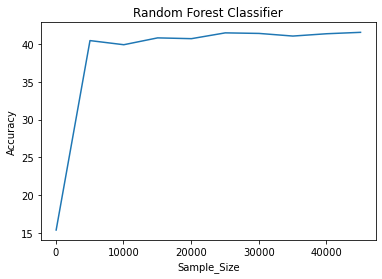

In [194]:
x_rfc = sample_list_rfc
y_rfc = acc_list_rfc
plt.plot(x_rfc,y_rfc)
#plt.titel("Sample-Error ")
plt.xlabel("Sample_Size")
plt.ylabel("Accuracy")

plt.title("Random Forest Classifier") 
plt.show()

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

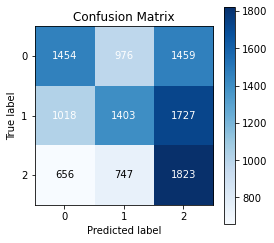

In [195]:
fig, ax = plt.subplots(figsize=(4,4))
plot_confusion_matrix(y_test, y_pred_rfc, ax=ax)

In [196]:
print('recall: ', recall_score(y_test, y_pred_rfc, average= 'macro')*100)
print('precision: ', precision_score(y_test, y_pred_rfc, average= 'macro')*100)
print('F1 Score:  ', f1_score(y_test, y_pred_rfc, average= 'macro')*100)
print('acc:  ' , accuracy_score(y_test, y_pred_rfc)*100)

recall:  42.57354734979772
precision:  42.58650125103544
F1 Score:   41.43079979603121
acc:   41.55198437361272


# 2.4.Decision Tree Classifier

In [207]:
sample_list_dtc = []  #sample_size'ları tutan liste
acc_list_dtc    = []  #her bir sample karşılık gelen 
best_acc_dtc    = 0
  
    
for i in np.arange(50, 47000, 5000):  

    df_sample = df_20_.sample(n = i)
    df_s = df_sample.fillna(0)
    sample_list_dtc.append(i)
    
    
    k =df_s.loc[:, "Month"] 
    y = list(k)
    label_encoder = LabelEncoder()
    Y = label_encoder.fit_transform(y)
    feature_names = ['retail_and_recreation_percent_change_from_baseline', 'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline']
    X = df_s[feature_names].values
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state =0)
    sc=StandardScaler()
    X_train = sc.fit_transform(x_train) 
    X_test = sc.transform(x_test)
    
    
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    
    y_pred_dtc = dtc.predict(X_test)
    acc_dtc = accuracy_score(y_test, y_pred_dtc)
    
    if best_acc_dtc < acc_dtc:
        best_acc_dtc = acc_dtc
    acc_list_dtc.append(acc_dtc*100)
    
    
print("Sample List: ",sample_list_dtc) #x: sample_size'ların listesi 
print("Accuracy List: ", acc_list_dtc)

Sample List:  [50, 5050, 10050, 15050, 20050, 25050, 30050, 35050, 40050, 45050]
Accuracy List:  [30.76923076923077, 38.00475059382423, 38.59928372463192, 38.08131809726282, 39.896269698783165, 39.50183618074406, 40.303473978437374, 40.22595001711743, 40.327574153600324, 40.19355411524461]


10 farklı sample değerleri[50, 5050.........] ile model eğitilmiş ve test edilmitir. 
Bunun sonucunda her bir sample için ayrı ayrı accuracy değerini hesaplanmıştır. 
Kullanılan veri sayısına göre modelin başarısının gözlemlenebilmesi için bu adım gerçekleştirilmiştir.
Sonuçlara bakıldığında veri sayısı arttıkça modelin başarısının da artmakta olduğu gözlemlenmiştir. 

Modeli %70lik bir veri seti ile eğittikten sonra %30 lik test için ayırdığımız kısım ile tahmin değeleri oluşturulmuştur.
Böylece en yüksek elde edilecek olan accuracy değeri best_acc adıyla yeni oluşturulan değişkene atanmıştır. 
Cccuracy metriği, genel olarak sınıflayıcının ne sıklıkta doğru tahmin ettiğinin bir ölçüsüdür.

In [208]:
print("Max Accuracy Decision Tree : ", best_acc_dtc*100)

Max Accuracy Decision Tree :  40.327574153600324


Her bir sample da elde ettiğimiz accuracy değerleri grafik çizdirilerek görselleştirilmiştir.
Eğitim ve test esnasında sample'lardan oluşan bir liste oluşturulmuştur (sample_list_dtc), o listeyi x_label olarak belirlenmiştir.
Sample'lara karşılık gelen accuracy değerlerinden oluşan liste (dtc modeli için acc_list_dtc) ise y labeli olarak belirlenmiştir. 
Grafik incelendiğinde;
Veri sayısı arttıkça (yani sample değeri büyüdükçe) modelimizin accuracy değeri artmaktadır. Veri sayısı ve accuracy değeri doğru orantılıdır.
Kullandığımız modeller ve problemimiz veri sayısına göre farklılık gösterebilir ve buna göre fazla veri ile iyileştirmenin yapılabileceği yorumu yapılabilir.

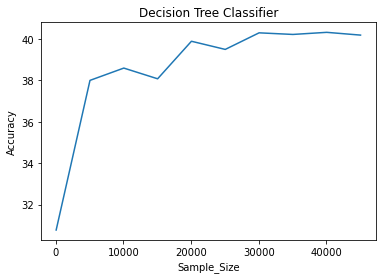

In [209]:
x_dtc = sample_list_dtc
y_dtc = acc_list_dtc
plt.plot(x_dtc,y_dtc)
#plt.titel("Sample-Error ")
plt.xlabel("Sample_Size")
plt.ylabel("Accuracy")

plt.title("Decision Tree Classifier") 
plt.show()

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

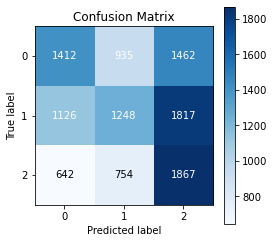

In [210]:
fig, ax = plt.subplots(figsize=(4,4))
plot_confusion_matrix(y_test, y_pred_dtc, ax=ax)

In [211]:
print('recall: ', recall_score(y_test, y_pred_dtc, average= 'macro')*100)
print('precision: ', precision_score(y_test, y_pred_dtc, average= 'macro')*100)
print('F1 Score:  ', f1_score(y_test, y_pred_dtc, average= 'macro')*100)
print('acc:  ' , accuracy_score(y_test, y_pred_dtc)*100)

recall:  41.35515925516975
precision:  41.0584870469918
F1 Score:   39.942664077758664
acc:   40.19355411524461


# 2.5.Gaussian Navie Bayes

In [213]:
sample_list_gnb = []  #sample_size'ları tutan liste
acc_list_gnb    = []  #her bir sample karşılık gelen 
best_acc_gnb    = 0
 
 
    
for i in np.arange(50, 47000, 5000):  

    df_sample = df_20_.sample(n = i)
    df_s = df_sample.fillna(0)
    sample_list_gnb.append(i)
    
    
    k =df_s.loc[:, "Month"] 
    y = list(k)
    label_encoder = LabelEncoder()
    Y = label_encoder.fit_transform(y)
    feature_names = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']
    X = df_s[feature_names].values
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state =0)
    sc=StandardScaler()
    X_train = sc.fit_transform(x_train) 
    X_test = sc.transform(x_test)
    
    
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    y_pred_gnb = gnb.predict(X_test)
    acc_gnb = accuracy_score(y_test, y_pred_gnb)
    
    if best_acc_gnb < acc_gnb:
        best_acc_gnb = acc_gnb
    acc_list_gnb.append(acc_gnb*100)
    
   
print("Sample List: ",sample_list_gnb) #x: sample_size'ların listesi 
print("Accuracy List: ", acc_list_gnb)

Sample List:  [50, 5050, 10050, 15050, 20050, 25050, 30050, 35050, 40050, 45050]
Accuracy List:  [38.46153846153847, 42.913697545526524, 44.28969359331476, 44.565506245017275, 45.5016955914622, 45.058278780137314, 45.361373619060295, 45.23564989158964, 44.08269249975032, 44.24220900292995]


In [214]:
print("Max Accuracy GaussianNB: ", best_acc_gnb*100)

Max Accuracy GaussianNB:  45.5016955914622


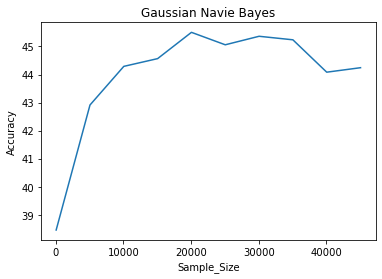

In [215]:
x_gnb = sample_list_gnb
y_gnb = acc_list_gnb
plt.plot(x_gnb,y_gnb)

plt.xlabel("Sample_Size")
plt.ylabel("Accuracy")

plt.title("Gaussian Navie Bayes") 
plt.show()

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

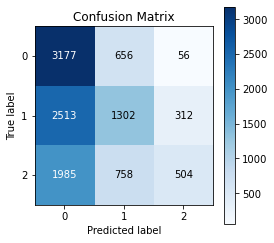

In [216]:
fig, ax = plt.subplots(figsize=(4,4))
plot_confusion_matrix(y_test, y_pred_gnb, ax=ax)

In [217]:
print('recall: ', recall_score(y_test, y_pred_gnb, average= 'macro')*100)
print('precision: ', precision_score(y_test, y_pred_gnb, average= 'macro')*100)
print('F1 Score:  ', f1_score(y_test, y_pred_gnb, average= 'macro')*100)
print('acc:  ' , accuracy_score(y_test, y_pred_gnb)*100)

recall:  42.920770727890265
precision:  49.04348209177638
F1 Score:   39.15727662021828
acc:   44.24220900292995


2.kısım Sonuç:
Tabloda da belirtildiği gibi 5 farklı model ile eğitim ve test gerçekleştirilmiştir.
accuracy, precision, recall ve f1 score metrikleri hesaplanmıştır.
İlk kısımda olduğu gibi bu kısımda da en yüksek başarı knn modeli ile elde edilmiştir. 
Tablodaki Accuracy max sütunu her bir modeli farklı 10 farklı sample'lar ile eğitip test ettikten sonra en yüksek accuracy değerini ifade etmektedir. 
Diğer metrikleri ise son sample olan 45050 ile train ve test sonucu elde edilen değerlerdir. 
İlk kısımve 2. kısımda elde edilen sonuçlara tekrar bakıldığında en yüksek değeri knn modeli sonucu elde edilmiştir. 
Bunun sonucunda kullandığımız veri seti ile proplemimize en uygun modelin knn olduğu sonucuna varılmaktadır. 

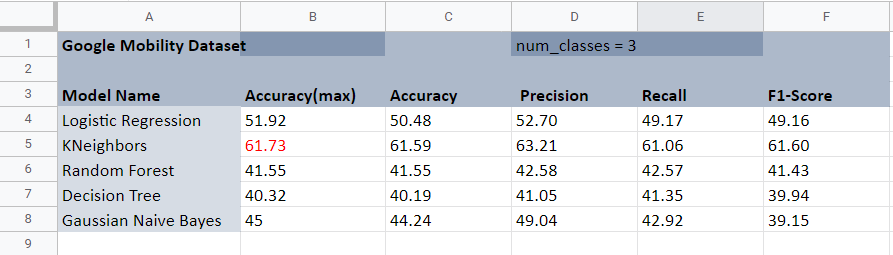

In [9]:
sonuc2 = Image.open("2Sonuc.png")
sonuc2